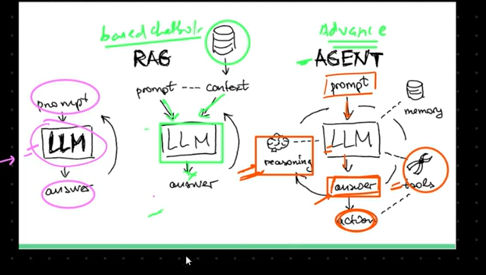

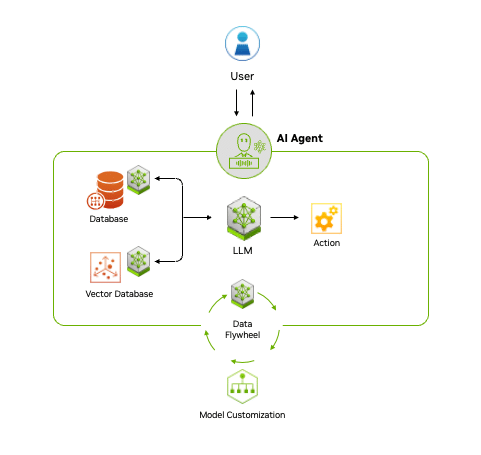
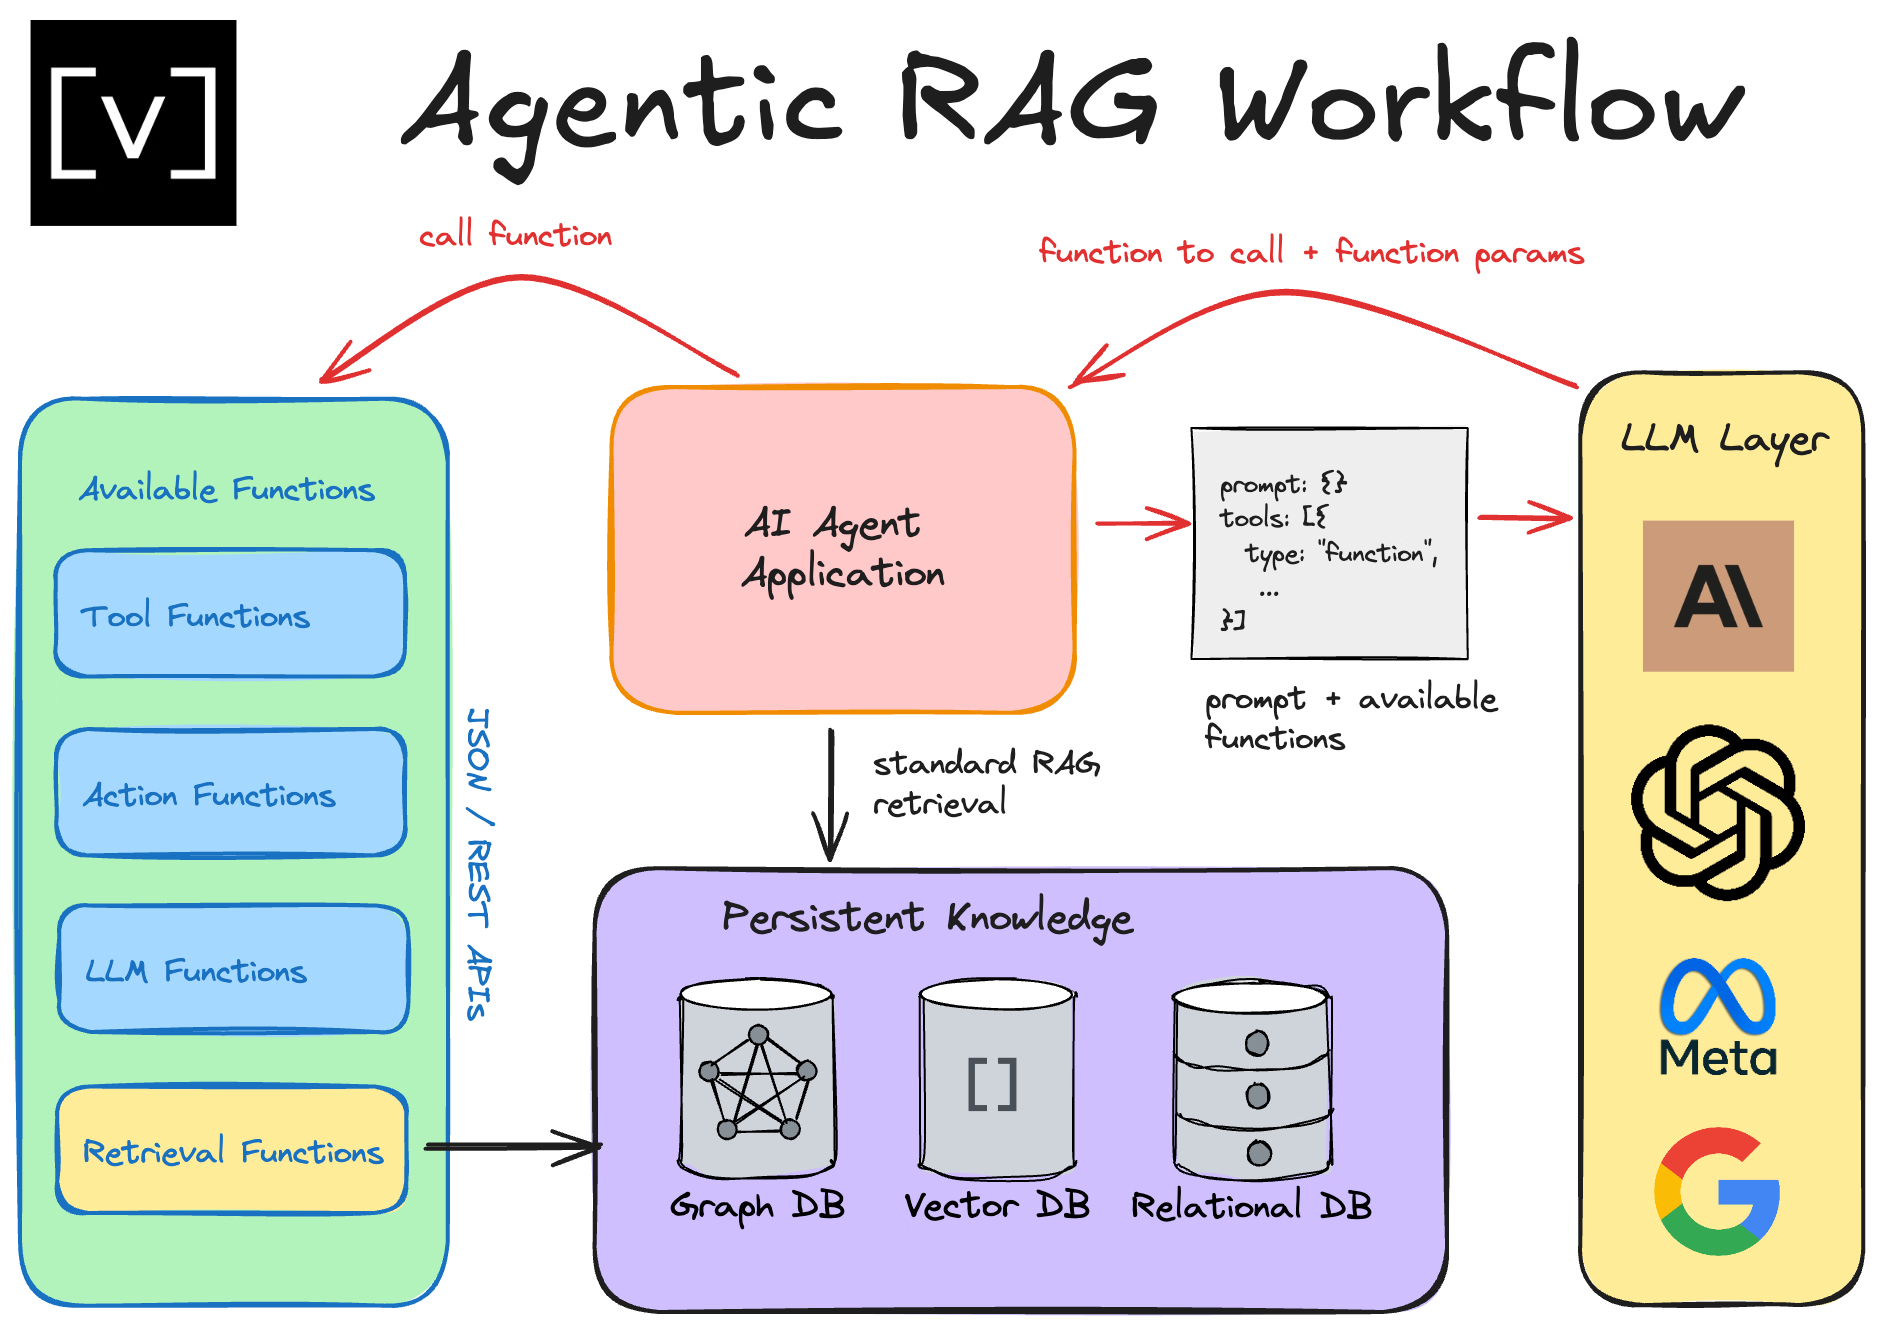

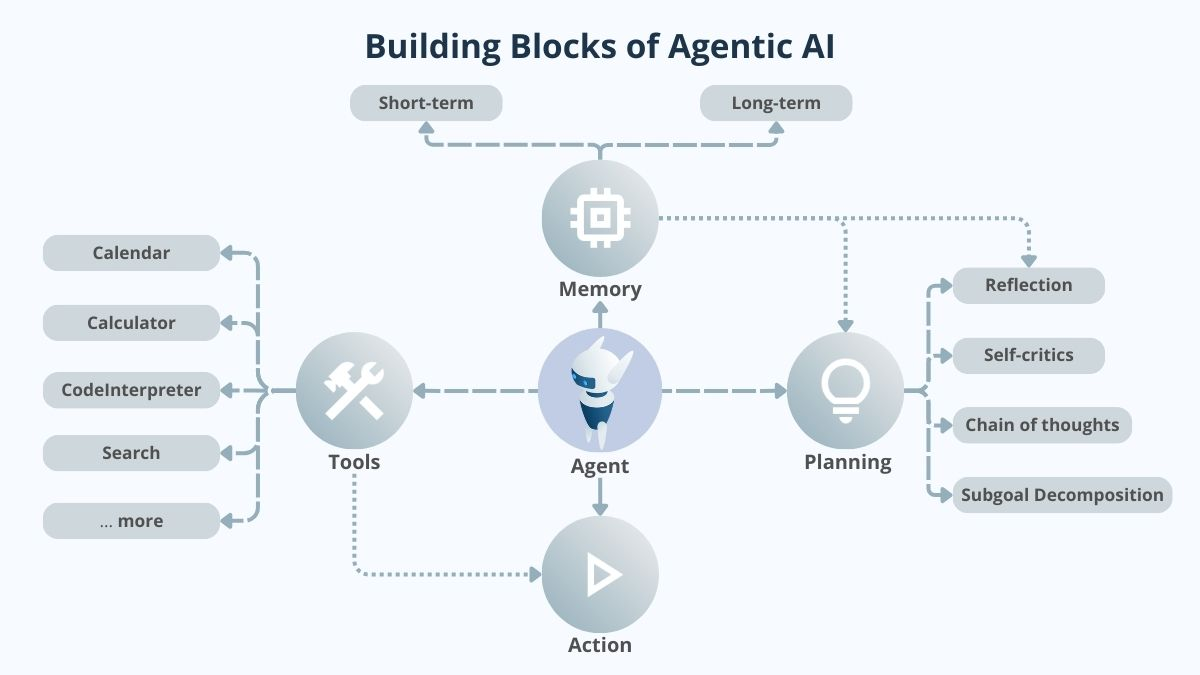

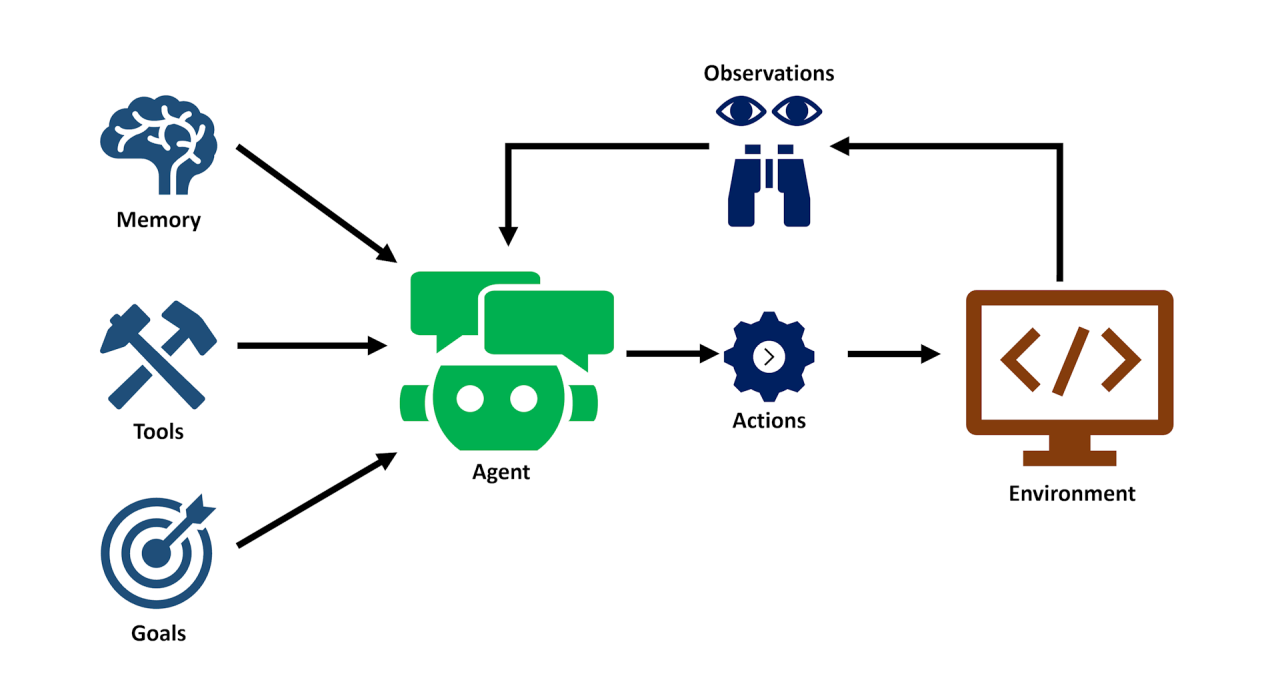

In [80]:
import os
from dotenv import load_dotenv
load_dotenv()

GOOGLE_API_KEY=os.getenv("GEMINI_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
SERPER_API_KEY=os.getenv("SERPER_API_KEY")
# LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ['SERPER_API_KEY'] = SERPER_API_KEY
# os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
# os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [2]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

d:\a27_YEARS_OLD\langgraph\venv\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lenovo\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [4]:
llm.invoke("hi,how are you?")

AIMessage(content="As an AI, I don't have feelings, but I'm here and ready to help! How are you doing today? 😊\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 15, 'total_tokens': 46, 'completion_time': 0.056363636, 'prompt_time': 7.539e-05, 'queue_time': 0.020769218, 'total_time': 0.056439026}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-e101ca7e-cb51-4d32-8d76-d9c284d8abf9-0', usage_metadata={'input_tokens': 15, 'output_tokens': 31, 'total_tokens': 46})

predefined tools

In [5]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper


In [6]:
api_wrapper = WikipediaAPIWrapper()
tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [7]:
print(tool.run({"query":  "langchain"}))

Page: LangChain
Summary: LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.



Page: Milvus (vector database)
Summary: Milvus is a distributed vector database developed by Zilliz. It is available as both open-source software and a cloud service.
Milvus is an open-source project under LF AI & Data Foundation distributed under the Apache License 2.0.



Page: Prompt injection
Summary: Prompt injection is a family of related computer security exploits carried out by getting a machine learning model which was trained to follow human-given instructions (such as an LLM) to follow instructions provided by a malicious user. This stands in contrast to the intended operation of instruction-following systems, wherein the ML model 

In [9]:
from langchain_community.tools import YouTubeSearchTool

In [10]:
tool2=YouTubeSearchTool()

In [12]:
tool2.run("3 blue 1 brown")

"['https://www.youtube.com/watch?v=IQqtsm-bBRU&pp=ygUOMyBibHVlIDEgYnJvd24%3D', 'https://www.youtube.com/watch?v=LPZh9BOjkQs&pp=ygUOMyBibHVlIDEgYnJvd24%3D']"

In [13]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [14]:
tool = TavilySearchResults()

In [15]:
tool.invoke({"query": "who is mohandas karamchand gandhi?"})

[{'url': 'https://www.britannica.com/summary/Mahatma-Gandhi',
  'content': 'Mahatma Gandhi summary\nExplore the life of Mahatma Gandhi as a political and social activist\nMahatma Gandhi, byname of Mohandas Karamchand Gandhi,\n(born Oct. 2, 1869, Porbandar, India—died Jan. 30, 1948, Delhi), Preeminent leader of Indian nationalism and prophet of nonviolence in the 20th century.\n He refashioned the Indian National Congress into an effective political instrument of Indian nationalism and undertook major campaigns of nonviolent resistance in 1920–22, 1930–34 (including his momentous march to the sea to collect salt to protest a government monopoly), and 1940–42. His success in South Africa gave him an international reputation, and in 1915 he returned to India and within a few years became the leader of a nationwide struggle for Indian home rule. Gandhi grew up in a home steeped in religion, and he took for granted religious tolerance and the doctrine of ahimsa (noninjury to all living bein

In [ ]:

# Tavily Search is a novel search algorithm that leverages the power of neural networks to improve the efficiency and effectiveness of search processes.
# Key Features:
# Neural Network-based: Tavily Search utilizes neural networks to learn patterns and relationships in the data, enabling more accurate and relevant search results.
# Semantic Search: Tavily Search focuses on understanding the semantic meaning of the search query and the data, allowing for more precise and context-aware search results.
# Efficient Indexing: Tavily Search employs an efficient indexing mechanism that enables fast and scalable search, even for large datasets.
# Applications:
# Information Retrieval: Tavily Search can be applied to various information retrieval tasks, such as document search, question answering, and text classification.
# Database Search: Tavily Search can be used to improve the efficiency and effectiveness of database search, particularly for large and complex datasets.
# Recommendation Systems: Tavily Search can be applied to recommendation systems to provide more accurate and personalized recommendations.
# Benefits:
# Improved Search Accuracy: Tavily Search provides more accurate and relevant search results, thanks to its neural network-based approach.
# Increased Efficiency: Tavily Search enables fast and scalable search, even for large datasets.
# Enhanced User Experience: Tavily Search provides a more intuitive and user-friendly search experience, thanks to its semantic search capabilities.

Create a Custom tool

In [16]:
from langchain.agents import tool # decorator 

In [17]:
@tool # decorator
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)

In [20]:
get_word_length.invoke("sadftbtyrw")

10

In [21]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [22]:
@tool
def summation (a: int, b: int) -> int:
    """Adding two numbers."""
    return a + b

In [23]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [25]:
multiply.invoke({"a":10,"b":20})

200

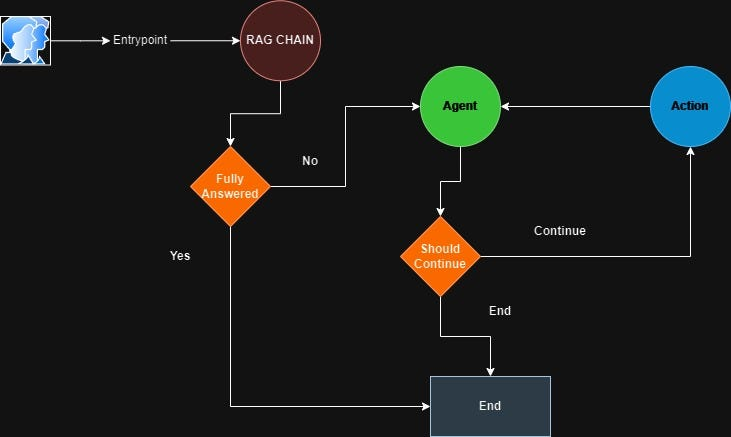

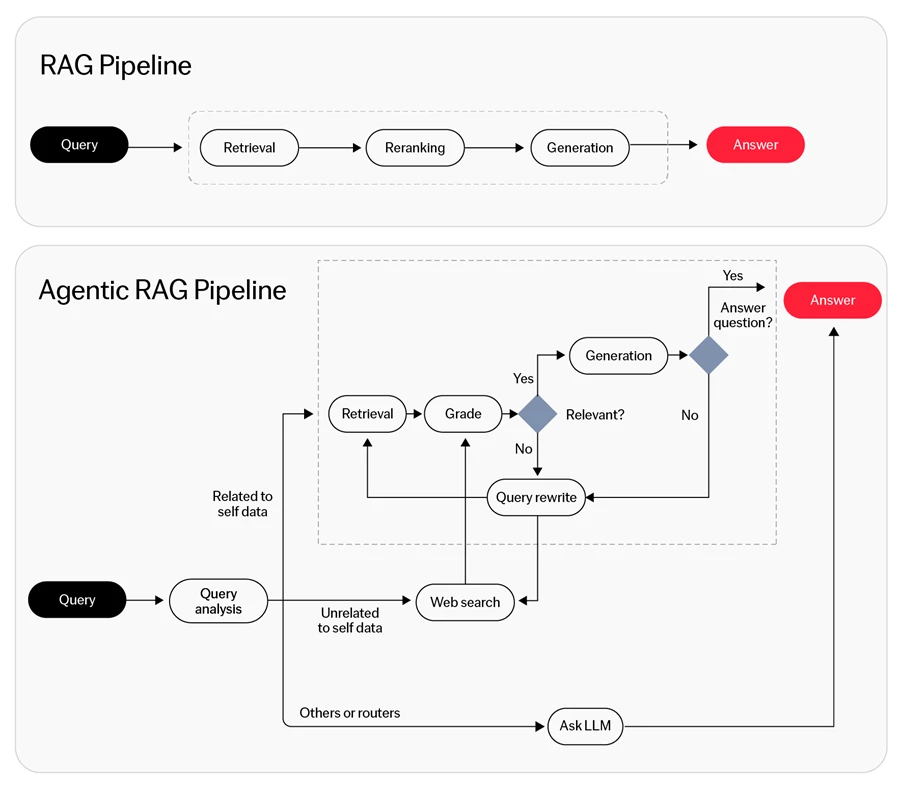

Concept of Agents

In [26]:
from langchain.agents import AgentType
from langchain.agents import load_tools 
from langchain.agents import initialize_agent

In [27]:
tool=load_tools(["wikipedia"],llm=llm)

In [28]:
agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3484\2645007812.py:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent=initialize_agent(tool,llm,agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,verbose=True)


In [ ]:
# tool: The tool or environment in which the agent will operate.
# llm: The large language model (LLM) that the agent will use for language understanding and generation.
# agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION: Specifies the type of agent to initialize, in this case, a zero-shot react description agent.
# verbose=True: Enables verbose mode, which may provide additional output or debugging information during the initialization process.
# Agent Type:
# The AgentType.ZERO_SHOT_REACT_DESCRIPTION parameter suggests that the agent is designed for zero-shot react description tasks. This means the agent can respond to prompts or situations without requiring explicit training data.

In [30]:
agent.run("what is llama and who create this llm model?")



> Entering new AgentExecutor chain...
Thought: I need to look up "llama" on Wikipedia to find information about the LLM model.
Action: wikipedia
Action Input: llama large language model
Observation: Page: Llama (language model)
Summary: Llama (Large Language Model Meta AI, formerly stylized as LLaMA) is a family of autoregressive large language models (LLMs) released by Meta AI starting in February 2023. The latest version is Llama 3.3, released in December 2024.
Llama models are trained at different parameter sizes, ranging between 1B and 405B. Originally, Llama was only available as a foundation model. Starting with Llama 2, Meta AI started releasing instruction fine-tuned versions alongside foundation models.
Model weights for the first version of Llama were made available to the research community under a non-commercial license, and access was granted on a case-by-case basis. Unauthorized copies of the first model were shared via BitTorrent. Subsequent versions of Llama were made

'Llama is a family of large language models created by Meta AI.'

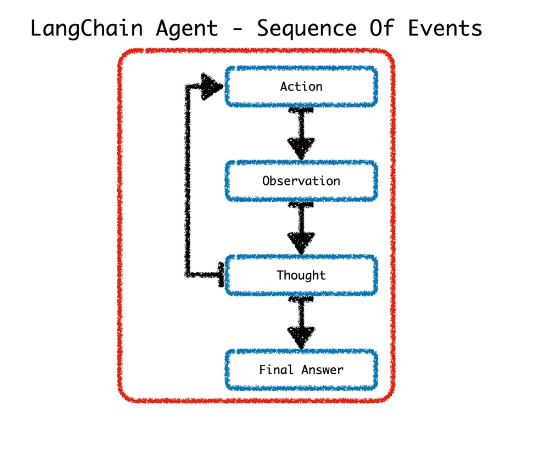

A Tool Calling Agent refers to an AI system or framework that dynamically invokes external tools or APIs to accomplish tasks as part of its decision-making process. Instead of relying solely on internal reasoning or knowledge, the agent calls specific tools to perform actions like calculations, searches, or other operations. This type of agent is often used in real-world applications where tasks require interaction with external systems.

In [31]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [32]:
search = TavilySearchResults() # this search tool is used to search from web

In [33]:
search.invoke("what is the weather in SF")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1737131941, 'localtime': '2025-01-17 08:39'}, 'current': {'last_updated_epoch': 1737131400, 'last_updated': '2025-01-17 08:30', 'temp_c': 7.8, 'temp_f': 46.0, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 4.3, 'wind_kph': 6.8, 'wind_degree': 206, 'wind_dir': 'SSW', 'pressure_mb': 1023.0, 'pressure_in': 30.22, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 96, 'cloud': 75, 'feelslike_c': 6.7, 'feelslike_f': 44.1, 'windchill_c': 6.7, 'windchill_f': 44.0, 'heatindex_c': 8.0, 'heatindex_f': 46.3, 'dewpoint_c': 7.2, 'dewpoint_f': 45.0, 'vis_km': 9.7, 'vis_miles': 6.0, 'uv': 0.2, 'gust_mph': 7.1, 'gust_kph': 11.4}}"},
 {'url': 'https://weathershogun.com/weather/usa/ca/san-fr

In [34]:
tools = [search]

In [ ]:
# ode Explanation:
# tools = [search]
# This line of code defines a list called tools and initializes it with a single element: search.
# Tool List:
# The tools list appears to be a collection of tools or functionalities that can be used by an agent or a model.

In [38]:
tools

[TavilySearchResults(api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********')))]

In [35]:
from langchain import hub

In [36]:
prompt=hub.pull("hwchase17/openai-functions-agent")

In [ ]:
# prompt = hub.pull("hwchase17/openai-functions-agent")
# This line of code uses the hub library to pull a pre-trained model or agent from the Hugging Face Model Hub.
# Model Hub:
# The Hugging Face Model Hub is a repository of pre-trained models and agents that can be easily downloaded and used for various NLP tasks.
# Model ID:
# The string "hwchase17/openai-functions-agent" is the ID of the model being pulled. This ID consists of:
# hwchase17: The username of the model creator.
# openai-functions-agent: The name of the model.

In [37]:
prompt

ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='

In [39]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

agent_scratchpad: The agent does not call a tool just once to get the desired answer, but has a structure that calls tools repeatedly until the desired answer is obtained. Each time you call a tool, what the previous call was like, information about the previous call, and the result are stored in this field.

In [40]:
from langchain.agents import create_tool_calling_agent
agent = create_tool_calling_agent(llm, tools, prompt)

In [41]:
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMes

In [42]:
from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:

# Here's a concise explanation:
# Code Explanation:
# agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
# This line of code creates an instance of the AgentExecutor class, passing in three parameters:
# agent=agent: The agent model or instance to be executed.
# tools=tools: The list of tools or functionalities to be used by the agent.
# verbose=True: Enables verbose mode, which may provide additional output or debugging information during execution.
# AgentExecutor:
# The AgentExecutor class is likely responsible for managing the execution of the agent,

In [43]:
agent_executor.invoke({"input": "hello how are you?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'hello how are you'}`


[{'url': 'https://eslforums.com/how-are-you/', 'content': 'Learn 60+ different ways to ask and respond to "How are you?" in English, a common greeting to check someone\'s well-being or state. See examples, infographics, and expressions for various situations.'}, {'url': 'https://www.neuralword.com/en/education-history-science-general-culture-society/writing-communication/how-to-say-hello-how-are-you-in-english', 'content': "Saying 'Hello' in English by Neuralword 07 September, 2023 Saying ‘Hello’ in English One of the most essential aspects of communication is greeting each other, and saying ‘Hello’ serves as the universal salutation. Ciao is written as Hello in English by Neuralword 15 June, 2023 Ciao is a common word in Italian that is used as a greeting or a farewell. How to Say 'Hello Beautiful' in English by Neuralword 07 December, 2023 Learning how to greet some

{'input': 'hello how are you?',
 'output': 'I am doing well, thank you for asking.'}

In [44]:
agent_executor.invoke({"input": "whats the weather in sf?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in sf'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'San Francisco', 'region': 'California', 'country': 'United States of America', 'lat': 37.775, 'lon': -122.4183, 'tz_id': 'America/Los_Angeles', 'localtime_epoch': 1737134884, 'localtime': '2025-01-17 09:28'}, 'current': {'last_updated_epoch': 1737134100, 'last_updated': '2025-01-17 09:15', 'temp_c': 8.9, 'temp_f': 48.0, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 3.8, 'wind_kph': 6.1, 'wind_degree': 204, 'wind_dir': 'SSW', 'pressure_mb': 1024.0, 'pressure_in': 30.24, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 93, 'cloud': 75, 'feelslike_c': 8.2, 'feelslike_f': 46.7, 'windchill_c': 6.8, 'windchill_f': 44.3, 'heatindex_c': 8.1, 'heatindex_f': 46.5, 'dewpoint_c': 7.8, 'dewpoint_f': 46.1, 'vis_km': 13.0, '

{'input': 'whats the weather in sf?',
 'output': 'The temperature in San Francisco today is 8.9 degrees Celsius or 48 degrees Fahrenheit.\n'}

In [45]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [46]:
loader = WebBaseLoader("https://medium.com/@bogatinov.leonardo/programming-a-guide-to-code-optimization-techniques-e0babca0d49b")
docs = loader.load()

In [47]:
docs

[Document(metadata={'source': 'https://medium.com/@bogatinov.leonardo/programming-a-guide-to-code-optimization-techniques-e0babca0d49b', 'title': 'PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | Medium', 'description': 'Efficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a…', 'language': 'en'}, page_content='PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | MediumOpen in appSign upSign inWriteSign upSign inPROGRAMMING:A Guide to Code Optimization TechniquesLeonardo Bogatinov·Follow4 min read·Oct 26, 2023--ListenSharePROGRAMMING:A Guide to Code Optimization TechniquesEfficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a web application, a mobile a

In [48]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200 # 1000 token in one chunk
).split_documents(docs)

In [52]:
documents

[Document(metadata={'source': 'https://medium.com/@bogatinov.leonardo/programming-a-guide-to-code-optimization-techniques-e0babca0d49b', 'title': 'PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | Medium', 'description': 'Efficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a…', 'language': 'en'}, page_content='PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | MediumOpen in appSign upSign inWriteSign upSign inPROGRAMMING:A Guide to Code Optimization TechniquesLeonardo Bogatinov·Follow4 min read·Oct 26, 2023--ListenSharePROGRAMMING:A Guide to Code Optimization TechniquesEfficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a web application, a mobile a

In [49]:
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [53]:
vector

In [54]:
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000001F7AC4A0FD0>, search_kwargs={})

In [55]:
retriever.invoke("how to optimize code ? ")

[Document(id='ba3835aa-2a15-4234-a4b5-cb5943aa4805', metadata={'source': 'https://medium.com/@bogatinov.leonardo/programming-a-guide-to-code-optimization-techniques-e0babca0d49b', 'title': 'PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | Medium', 'description': 'Efficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a…', 'language': 'en'}, page_content='PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | MediumOpen in appSign upSign inWriteSign upSign inPROGRAMMING:A Guide to Code Optimization TechniquesLeonardo Bogatinov·Follow4 min read·Oct 26, 2023--ListenSharePROGRAMMING:A Guide to Code Optimization TechniquesEfficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether yo

In [56]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(  # this retrival tool is used to search vector from faiss database
    retriever,
    "code_optimiation_search",
    "Search for information about code optimization!",
)

In [ ]:
# retriever: The underlying retriever model or algorithm.
# code_optimization_search: The name or ID of the retriever tool.
# Search for information about code optimization!: The description or prompt for the retriever tool.
# Retriever Tool:
# The retriever_tool object represents a specialized tool for retrieving information related to code optimization.

In [57]:
tools = [search, retriever_tool] # use two tools to search for information about code optimization one from web and one from
# vector database

In [58]:
from langchain.agents import create_tool_calling_agent

agent = create_tool_calling_agent(llm, tools, prompt)

In [59]:
agent

RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMes

In [60]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [61]:
agent_executor

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], optional_variables=['chat_history'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMe

In [62]:
agent_executor.invoke({"input": "hi! what is code optimization ?"})



> Entering new AgentExecutor chain...

Invoking: `code_optimiation_search` with `{'query': 'what is code optimization'}`


PROGRAMMING:A Guide to Code Optimization Techniques | by Leonardo Bogatinov | MediumOpen in appSign upSign inWriteSign upSign inPROGRAMMING:A Guide to Code Optimization TechniquesLeonardo Bogatinov·Follow4 min read·Oct 26, 2023--ListenSharePROGRAMMING:A Guide to Code Optimization TechniquesEfficiency is a hallmark of great code. Well-optimized code not only runs faster but also consumes fewer resources, making it a fundamental aspect of software development. Whether you’re building a web application, a mobile app, or any piece of software, optimizing your code is a crucial step to enhance performance and ensure a smooth user experience. In this article, we’ll explore various code optimization techniques to help you write more efficient and effective code.1. Measure Before You OptimizeBefore diving into optimization, it’s essential to have a baseline to compare ag

{'input': 'hi! what is code optimization ?',
 'output': 'Code optimization is the process of improving the efficiency of your code. This means making it run faster, use less memory, and generally be more performant.  There are many techniques for code optimization, and the best approach will vary depending on the specific code and the desired outcome.'}

In [66]:
agent_executor.invoke({"input": "what is the temperature in kolkata?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'what is the temperature in kolkata'}`


[{'url': 'https://www.aqi.in/weather/in/india/west-bengal/kolkata', 'content': 'Current Kolkata weather condition is Mist with real-time temperature (25°C), humidity 34%, wind 17.6km/h, pressure (1016mb), UV (1.9), visibility (4km) in West Bengal.'}, {'url': 'https://www.weather-atlas.com/en/india/kolkata', 'content': 'In Kolkata, during the evening and for the rest of the night, mostly clear weather is anticipated. The lowest temperature will be an enjoyable 16°C (60.8°F). Sunrise was at 6:17 am and sunset at 5:13 pm; the daylight lasted for 10h and 56min.'}, {'url': 'https://www.timeanddate.com/weather/india/kolkata', 'content': 'Weather 72\xa0°F Forecast: 85 / 64\xa0°F Current Time:   Nov 19, 2024 at 8:33:24 am See more hour-by-hour weather Forecast for the next 48 hours Forecast                           * Updated Tuesday, November 19, 2024 6:33:0

{'input': 'what is the temperature in kolkata?', 'output': '22°C \n'}

In [67]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

### short term memory in a session

In [68]:
message_history=ChatMessageHistory()

In [75]:
chat_history = []

In [74]:
agent_with_chat_history = RunnableWithMessageHistory(
    agent_executor,
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    lambda session_id: message_history,
    input_messages_key="input",
    history_messages_key="chat_history",
)

In [76]:
agent_with_chat_history

RunnableWithMessageHistory(bound=RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  chat_history: RunnableBinding(bound=RunnableLambda(_enter_history), kwargs={}, config={'run_name': 'load_history'}, config_factories=[])
}), kwargs={}, config={'run_name': 'insert_history'}, config_factories=[])
| RunnableBinding(bound=RunnableLambda(_call_runnable_sync), kwargs={}, config={'run_name': 'check_sync_or_async'}, config_factories=[]), kwargs={}, config={'run_name': 'RunnableWithMessageHistory'}, config_factories=[]), kwargs={}, config={}, config_factories=[], get_session_history=<function <lambda> at 0x000001F7ED1E5B20>, input_messages_key='input', history_messages_key='chat_history', history_factory_config=[ConfigurableFieldSpec(id='session_id', annotation=<class 'str'>, name='Session ID', description='Unique identifier for a session.', default='', is_shared=True, dependencies=None)])

In [77]:
agent_with_chat_history.invoke(
    {"input": "hi! my name is sam how are you?"},
    # This is needed because in most real world scenarios, a session id is needed
    # It isn't really used here because we are using a simple in memory ChatMessageHistory
    config={"configurable": {"session_id": "firstchat"}},
)



> Entering new AgentExecutor chain...
I'm doing well, thanks for asking! What can I do for you today, Sam?

> Finished chain.


{'input': 'hi! my name is sam how are you?',
 'chat_history': [HumanMessage(content='hi! my name is sunny how are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="I am an AI assistant, so I don't have feelings like humans do.  How can I help you today?", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='hi! my name is sam how are you?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="I'm doing well, thanks for asking! What can I do for you today, Sam?", additional_kwargs={}, response_metadata={})],
 'output': "I'm doing well, thanks for asking! What can I do for you today, Sam?"}

ReAct Agent (Reasoning + Acting):
Definition:

The ReAct framework combines reasoning and acting in a single loop to handle tasks. The agent uses natural language reasoning (thinking through steps) and task actions (performing tasks like calculations or data retrieval).

The agent uses a combination of reasoning steps to guide actions in real-time, using feedback from those actions to further inform the next step in reasoning.

How it works:

Step 1: The agent receives a question or task.
Step 2: It reasons aloud (in natural language) about how to solve it.
Step 3: Based on its reasoning, it takes actions (e.g., searching a database, calculating something).
Step 4: The results of these actions are integrated into its reasoning and may trigger further actions.
Step 5: It repeats the process until it arrives at a solution.

Key points:

Combines thinking and doing (reasoning and actions).
Performs iterative steps, updating its process based on action results.
Typically handles complex decision-making scenarios.

Example:

Original task: “Calculate the total number of apples in a basket if there are 4 baskets and 7 apples in each.”
Reasoning: "I need to multiply 4 by 7 to get the total number of apples."
Action: Perform the multiplication.
Result: "There are 28 apples."
Reasoning: "I am done."

In [78]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import Tool
from langchain_core.prompts import PromptTemplate
from langchain.agents import AgentExecutor, create_react_agent

### add search api 

In [81]:
google_search = GoogleSerperAPIWrapper()

tools = [
    Tool(
        name="Intermediate Answer",
        func=google_search.run,
        description="useful for when you need to ask with search",
        verbose=True
    )
]

In [82]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [83]:
prompt = PromptTemplate.from_template(template)

##### react agent

In [84]:
search_agent = create_react_agent(llm,tools,prompt)

In [85]:
agent_executor = AgentExecutor(
    agent=search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True,
)

In [86]:
agent_executor.invoke({"input": "Where is the hometown of the 2007 US PGA championship winner and his score?"})



> Entering new AgentExecutor chain...
Thought: I need to find out who won the 2007 US PGA Championship and where they are from.
Action: Intermediate Answer
Action Input: Who won the 2007 US PGA Championship?The 2007 PGA Championship was the 89th PGA Championship, played August 9–12 at Southern Hills Country Club in Tulsa, Oklahoma. Defending champion Tiger Woods won his fourth PGA Championship and 13th major title, two strokes ahead of runner-up Woody Austin.Thought: I know Tiger Woods won and that the tournament was in Tulsa, Oklahoma.  I need to find where Tiger Woods is from.
Action: Intermediate Answer
Action Input: Where is Tiger Woods from?Cypress, CAThought: I now know the final answer
Final Answer: Tiger Woods, who won the 2007 US PGA Championship with a score of -8, is from Cypress, CA. 


> Finished chain.


{'input': 'Where is the hometown of the 2007 US PGA championship winner and his score?',
 'output': 'Tiger Woods, who won the 2007 US PGA Championship with a score of -8, is from Cypress, CA.',
 'intermediate_steps': [(AgentAction(tool='Intermediate Answer', tool_input='Who won the 2007 US PGA Championship?', log='Thought: I need to find out who won the 2007 US PGA Championship and where they are from.\nAction: Intermediate Answer\nAction Input: Who won the 2007 US PGA Championship?'),
   'The 2007 PGA Championship was the 89th PGA Championship, played August 9–12 at Southern Hills Country Club in Tulsa, Oklahoma. Defending champion Tiger Woods won his fourth PGA Championship and 13th major title, two strokes ahead of runner-up Woody Austin.'),
  (AgentAction(tool='Intermediate Answer', tool_input='Where is Tiger Woods from?', log='Thought: I know Tiger Woods won and that the tournament was in Tulsa, Oklahoma.  I need to find where Tiger Woods is from.\nAction: Intermediate Answer\nAct

In [87]:
from langchain.tools import tool
from langchain import hub
from langchain.agents import AgentExecutor, create_react_agent

In [88]:
# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found") # exception handler for dict if key not found

In [89]:
# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

### react prompt

In [90]:
# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react")

In [91]:

print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [92]:

tools = [get_employee_salary, get_employee_id]

In [93]:
agent = create_react_agent(llm,tools,prompt)

In [94]:
agent_executor = AgentExecutor(agent=agent,tools=tools,verbose=True)

In [95]:
agent_executor.invoke({"input":"What is the Salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: I need to find Evan's employee ID first, then I can use that to get his salary. 
Action: get_employee_id
Action Input: EvanE005Thought: Now that I have Evan's employee ID, I can find his salary.
Action: get_employee_salary
Action Input: E00545000Thought: I now know the final answer
Final Answer: 45000 


> Finished chain.


{'input': 'What is the Salary of Evan?', 'output': '45000'}

latest version

Self-Ask with Search Agent:

Definition:

This approach allows the AI to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
Once the AI generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.

How it works:

Step 1: Receive a complex question.
Step 2: The agent identifies sub-questions or follow-up questions.
Step 3: It performs a search or fetches answers to these questions from external resources (like a web search).
Step 4: The answers are aggregated to provide a complete response.

Key points:

Emphasizes question decomposition.
Relies on external search for sub-questions.
Useful for answering open-ended or broad questions where the answer is not immediately available.

Example:

Original question: “How many moons does Jupiter have?”
Sub-q

In [96]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

#### save session memory

In [97]:
memory = MemorySaver()
search = TavilySearchResults(max_results=2)

In [98]:
tools = [search]

In [99]:
agent_executor = create_react_agent(llm, tools, checkpointer=memory)

In [100]:
# Use the agent
config = {"configurable": {"thread_id": "abc123"}}

In [101]:
for chunk in agent_executor.stream({"messages": [HumanMessage(content="hi im bob! and i live in sf")]}, config):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mr01', 'function': {'arguments': '{"query":"What is the weather in San Francisco?"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 93, 'prompt_tokens': 990, 'total_tokens': 1083, 'completion_time': 0.169090909, 'prompt_time': 0.039994315, 'queue_time': 0.020868633999999997, 'total_time': 0.209085224}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-f9af4c61-ba14-47c7-971d-ec8fa2f5db09-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'What is the weather in San Francisco?'}, 'id': 'call_mr01', 'type': 'tool_call'}], usage_metadata={'input_tokens': 990, 'output_tokens': 93, 'total_tokens': 1083})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\'

In [102]:
for chunk in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather where I live?")]}, config
):
    print(chunk)
    print("----")

{'agent': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q4nj', 'function': {'arguments': '{"query":"What is the weather in San Francisco?"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 55, 'prompt_tokens': 1833, 'total_tokens': 1888, 'completion_time': 0.1, 'prompt_time': 0.058720633, 'queue_time': 0.024520487, 'total_time': 0.158720633}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0af69447-e077-4965-9cfa-58b42d97ad18-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'What is the weather in San Francisco?'}, 'id': 'call_q4nj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1833, 'output_tokens': 55, 'total_tokens': 1888})]}}
----
{'tools': {'messages': [ToolMessage(content='[{"url": "https://www.weatherapi.com/", "content": "{\'location\': {\'name\': \'San Francis